## HR Analytics - 
-- Data Analysis by Anita Durg

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_orig = pd.read_csv('turnover.csv')

In [3]:
df_orig.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df_orig.shape

(14999, 10)

In [5]:
df_orig.columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'churn',
       'promotion', 'department', 'salary'],
      dtype='object')

In [6]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df_orig.isna().any()

satisfaction            False
evaluation              False
number_of_projects      False
average_montly_hours    False
time_spend_company      False
work_accident           False
churn                   False
promotion               False
department              False
salary                  False
dtype: bool

#### No null values noted

### Summay statistics

In [8]:
df_orig.describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Based on this statistics, below are some of the insights that i could draw:
* Average monthly hours is around 200 hours. That means per day on an average an employee works for 10 hours. <br />
* Maximum an employee can stay with this company is 10 years and minimum of 2 years<br />
* On an average, an employee can stick with the company for three and half years<br />
* the lower number of days shows lowest satisfaction level. ?<br />

In [9]:
df_orig['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

### Which department has highest churning count?

In [10]:
df_orig.query("churn == 1").groupby(['department','churn']).agg(
                            churn_cnt=('churn', 'count'),
                           ).reset_index().sort_values('churn_cnt', ascending=False)

,department,churn,churn_cnt
7,sales,1,1014
9,technical,1,697
8,support,1,555
0,IT,1,273
3,hr,1,215
2,accounting,1,204
5,marketing,1,203
6,product_mng,1,198
1,RandD,1,121
4,management,1,91


In [11]:
churn_val_df = df_orig.query("churn == 1").groupby(['department','churn']).agg(
                            churn_cnt=('churn', 'count'),
                           ).reset_index().sort_values('churn_cnt', ascending=False)

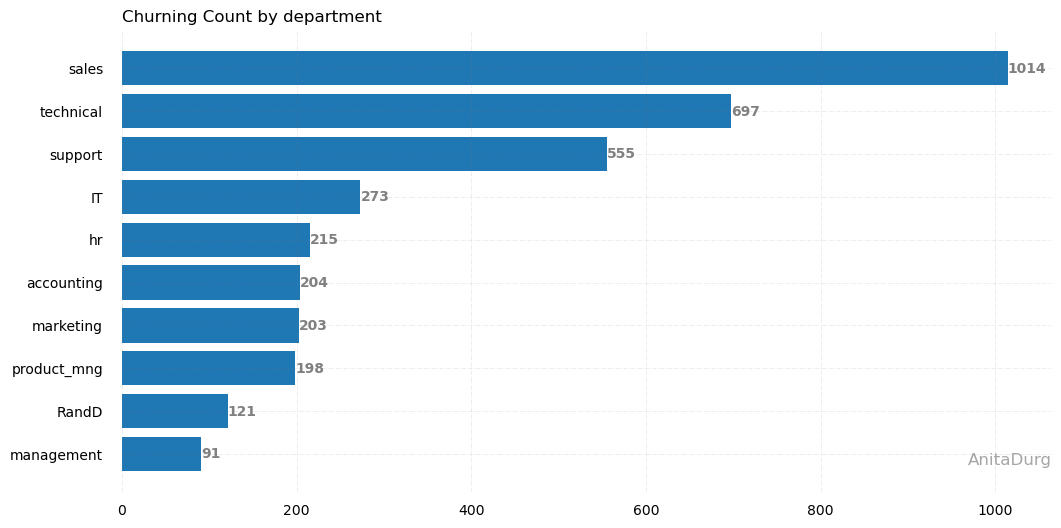

In [12]:
# Figure Size
fig, ax = plt.subplots(figsize =(12, 6))
# Horizontal Bar Plot
ax.barh(churn_val_df['department'], churn_val_df['churn_cnt'])

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Churning Count by department',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'AnitaDurg', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()


### TOP 5 departments with high churn counts

In [13]:
churn_val_df[['department','churn_cnt']].nlargest(5, 'churn_cnt').style.hide(axis='index')

department,churn_cnt
sales,1014
technical,697
support,555
IT,273
hr,215


### Get the churning rate by department so we can assess which department has highest churning rate

In [14]:
df_orig.groupby(['department']).agg(num_employees = ('department', 'count')).sort_values('num_employees', ascending=False)

,num_employees
department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [15]:
df_orig.groupby(['department', 'churn']).agg(num_employees = ('churn', 'count'))

num_employees
department  churn               
IT          0                954
            1                273
RandD       0                666
            1                121
accounting  0                563
            1                204
hr          0                524
            1                215
management  0                539
            1                 91
marketing   0                655
            1                203
product_mng 0                704
            1                198
sales       0               3126
            1               1014
support     0               1674
            1                555
technical   0               2023
            1                697

In [16]:
dept_churn = df_orig.groupby(['department', 'churn']).agg(percentage = ('churn', 'count'))
department_gp = df_orig.groupby(['department']).agg(percentage = ('churn', 'count'))
round(dept_churn.div(department_gp, level='department') * 100,0)

percentage
department  churn            
IT          0            78.0
            1            22.0
RandD       0            85.0
            1            15.0
accounting  0            73.0
            1            27.0
hr          0            71.0
            1            29.0
management  0            86.0
            1            14.0
marketing   0            76.0
            1            24.0
product_mng 0            78.0
            1            22.0
sales       0            76.0
            1            24.0
support     0            75.0
            1            25.0
technical   0            74.0
            1            26.0

In [17]:
churn_all_df = round(dept_churn.div(department_gp, level='department') * 100,0)

In [18]:
churn_all_df

percentage
department  churn            
IT          0            78.0
            1            22.0
RandD       0            85.0
            1            15.0
accounting  0            73.0
            1            27.0
hr          0            71.0
            1            29.0
management  0            86.0
            1            14.0
marketing   0            76.0
            1            24.0
product_mng 0            78.0
            1            22.0
sales       0            76.0
            1            24.0
support     0            75.0
            1            25.0
technical   0            74.0
            1            26.0

In [19]:
churn_all_df.reset_index(inplace=True)

In [20]:
churn_all_df[churn_all_df['churn']==1].sort_values(by='percentage',ascending=False)

,department,churn,percentage
7,hr,1,29.0
5,accounting,1,27.0
19,technical,1,26.0
17,support,1,25.0
11,marketing,1,24.0
15,sales,1,24.0
1,IT,1,22.0
13,product_mng,1,22.0
3,RandD,1,15.0
9,management,1,14.0


### Based on the above, we can infer that the top five departments with higher churning rates are HR, Accounting, Technical, Support, Marketing

In [21]:
churn_rate_by_dept = churn_all_df[churn_all_df['churn']==1].sort_values(by='percentage',ascending=False)

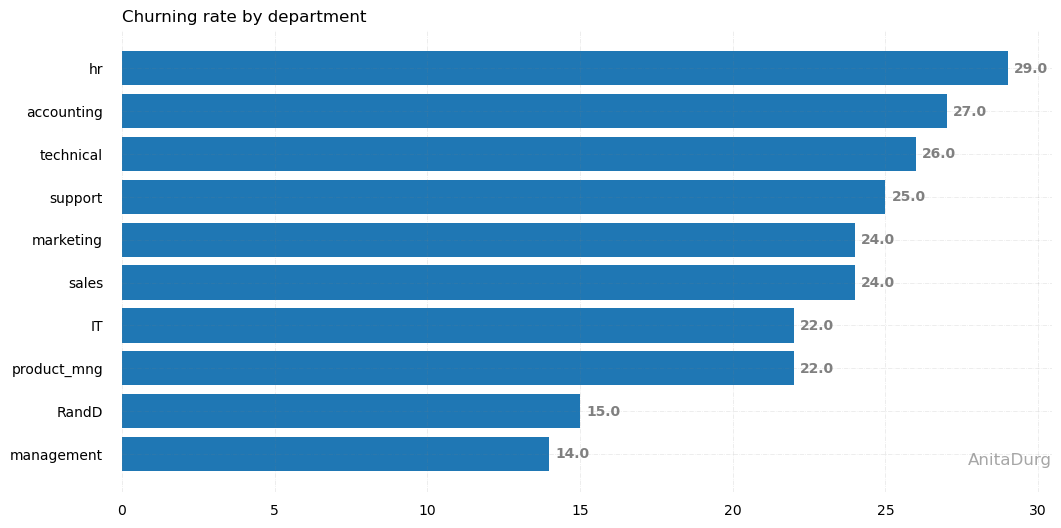

In [22]:
# Figure Size
fig, ax = plt.subplots(figsize =(12, 6))
# Horizontal Bar Plot
ax.barh(churn_rate_by_dept['department'], churn_rate_by_dept['percentage'])

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Churning rate by department',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'AnitaDurg', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

### Based on this, I can say that HR department has high rate of churning

### what could be the reasons for high churning rate in HR department?

In [23]:
df_orig['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [24]:
df_orig['salary'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14999 entries, 0 to 14998
Series name: salary
Non-Null Count  Dtype 
--------------  ----- 
14999 non-null  object
dtypes: object(1)
memory usage: 117.3+ KB


In [25]:
# Change the type of the "salary" column to categorical
df_orig['salary'] = df_orig['salary'].astype('category')

In [26]:
df_orig['salary'] = df_orig['salary'].cat.reorder_categories(['low', 'medium', 'high'])

df_orig['salary'] = df_orig['salary'].cat.codes

In [27]:
df_orig['salary'].value_counts()

0    7316
1    6446
2    1237
Name: salary, dtype: int64

In [28]:
df_orig.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


## Encoding categorical variables

In [29]:
# Change the type of the "salary" column to categorical
df_orig['department'] = df_orig['department'].astype('category')

In [30]:
categorical_features = ['department']
df_orig = pd.get_dummies(df_orig, columns = categorical_features)
print('The data have ', df_orig.shape[0], ' rows and ', df_orig.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(df_orig.columns)))

The data have  14999  rows and  19  columns

column names: 

satisfaction
evaluation
number_of_projects
average_montly_hours
time_spend_company
work_accident
churn
promotion
salary
department_IT
department_RandD
department_accounting
department_hr
department_management
department_marketing
department_product_mng
department_sales
department_support
department_technical


In [31]:
df_orig.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [32]:
df_hr_dept = df_orig[df_orig['department_hr'] == 1]

In [33]:
df_hr_dept.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
31,0.45,0.57,2,134,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0
32,0.40,0.51,2,145,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0
33,0.45,0.55,2,140,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0
34,0.84,0.87,4,246,6,0,1,0,0,0,0,0,1,0,0,0,0,0,0
108,0.71,0.87,3,177,4,0,1,0,1,0,0,0,1,0,0,0,0,0,0


In [34]:
drop_cols=['department_IT','department_RandD','department_accounting','department_management','department_marketing','department_product_mng','department_sales','department_support','department_technical']
df_hr_dept.drop(drop_cols,axis=1,inplace=True)

C:\Users\anita\AppData\Local\Temp\ipykernel_2836\2691150543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hr_dept.drop(drop_cols,axis=1,inplace=True)


In [35]:
df_hr_dept.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary,department_hr
31,0.45,0.57,2,134,3,0,1,0,0,1
32,0.40,0.51,2,145,3,0,1,0,0,1
33,0.45,0.55,2,140,3,0,1,0,0,1
34,0.84,0.87,4,246,6,0,1,0,0,1
108,0.71,0.87,3,177,4,0,1,0,1,1


In [36]:
df_hr_dept.shape

(739, 10)

In [37]:
## i can delete even that department_hr column as it does we know that this is the data frame for HR department
df_hr_dept.drop(['department_hr'],axis=1,inplace=True)

C:\Users\anita\AppData\Local\Temp\ipykernel_2836\4067368380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hr_dept.drop(['department_hr'],axis=1,inplace=True)


In [38]:
df_hr_dept.shape

(739, 9)

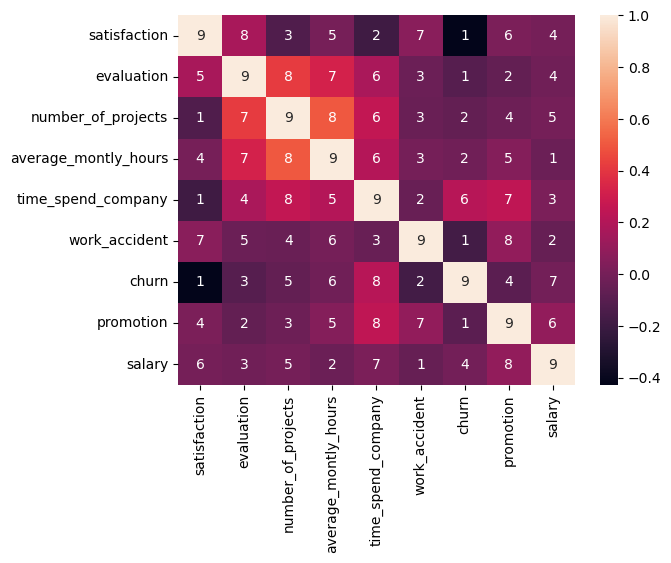

In [39]:
corr_matrix = df_hr_dept.corr()
sns.heatmap(corr_matrix, annot=corr_matrix.rank(axis="columns"))
plt.show()

## Based on this heatmap and the correlation ranks, here are my insights

* There is a strong negative coreelation of churn with evaluations,satisfaction,promotion, and work_accident. 
* THere is a significant negative correlation of churn verus average_monthly_hours and number of projects
* not a strong correlation with salary.
* weakest correlation with Time_spend_company 
* We notice that average_monthly_hours is pretty high for this company. It could be one reason why thruover rate is high. may be the company should reduce the work hours in order to retain the employees which will reduce the cost the company.

If Company wants to retain the employee, then it should consider giving promotion if it is due. Or understand why the satisfaction rate is low. Can company make it intersting or challenge the employee? 

## Analysis made so far....

* Number of Employees - 14999
* Largest Department - sales
* Smallest Department - management
* Department with Highest Churn Rate - hr
* Department with lowest Churn Rate - Management
* Churn Rate in HR department is high due to low satisfaction, poor evaluation, no promotions, 

In [40]:
df_orig['promotion'].unique()

array([0, 1], dtype=int64)

In [41]:
df_orig['work_accident'].unique()

array([0, 1], dtype=int64)

In [42]:
df_orig['churn'].value_counts()

0    11428
1     3571
Name: churn, dtype: int64

In [43]:
leave = df_orig[df_orig['churn']==1].shape[0] #3571
stayed = df_orig[df_orig['churn']==0].shape[0] #11428
print("percentage of people leaving the company ", leave/len(df_orig) * 100)


percentage of people leaving the company  23.80825388359224


In [44]:
churn_class_counts = df_orig['churn'].value_counts()
churn_class_counts

0    11428
1     3571
Name: churn, dtype: int64

In [45]:
type(churn_class_counts)

pandas.core.series.Series

In [46]:
churn_class_percentages = pd.Series([(x / df_orig.shape[0]) * 100.00 for x in churn_class_counts])
churn_class_percentages

0    76.191746
1    23.808254
dtype: float64

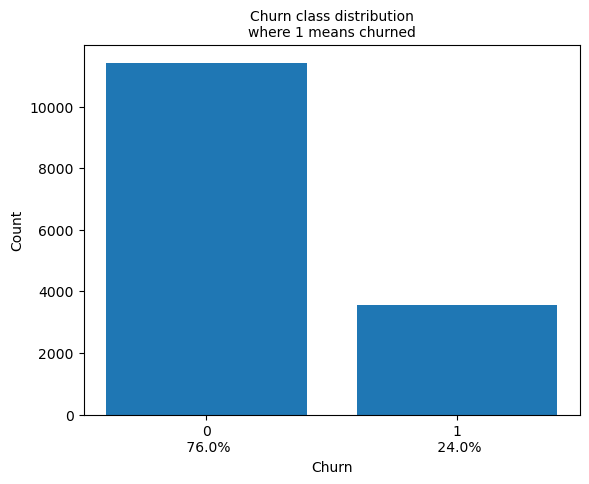

In [47]:
fig, ax = plt.subplots()
ax.bar(churn_class_counts.index, churn_class_counts)
ax.set_xticks([0, 1])
ax.set_xticklabels(churn_class_percentages.index.astype(str) + '\n' + ' ' +
                   churn_class_percentages.round(0).astype(str) + '%')
ax.set_ylabel('Count')
ax.set_xlabel('Churn')
ax.set_title('Churn class distribution\nwhere 1 means churned',
              fontsize = 10)
plt.show()



## Predcitive Analysis

In [48]:
# Choose the dependent variable column (churn) and set it as target
target = df_orig.churn

# Drop column churn and set everything else as features
features = df_orig.drop("churn",axis=1)

In [49]:
# Import the function for splitting dataset into train and test
from sklearn.model_selection import train_test_split

# Use that function to create the splits both for target and for features
# Set the test sample to be 25% of your observations
Xtrain, Xtest, ytrain, ytest = train_test_split(features,target,test_size=0.25,random_state=42)

In [50]:
Xtrain.shape

(11249, 18)

In [51]:
# Import the classification algorithm
from sklearn.tree import DecisionTreeClassifier

# Initialize it and call model by specifying the random_state parameter
model = DecisionTreeClassifier(random_state=42)

# Apply a decision tree model to fit features to the target
model.fit(Xtrain, ytrain)

DecisionTreeClassifier(random_state=42)

In [52]:
# Apply a decision tree model to fit features to the target in the training set
model.fit(Xtrain,ytrain)

# Check the accuracy score of the prediction for the training set
model.score(Xtrain,ytrain)*100



100.0

In [53]:
# Check the accuracy score of the prediction for the test set
model.score(Xtest,ytest)*100

97.22666666666666

###  algorithm did perfectly on the training set. On the testing set, it was able to correctly predict if an employee would leave or not in almost 98% of the cases! Excellent!

#### We are seeing a overfitting issue here. Train split gave 100% whereas test split gave 97%.  Defeinitely there is overfitting as the model has worked on the train set 100%. 

In [54]:
# Import the graphical visualization export function
from sklearn.tree import export_graphviz

# Apply Decision Tree model to fit Features to the Target
model.fit(Xtrain,ytrain)

# Export the tree to a dot file
export_graphviz(model,"tree.dot")

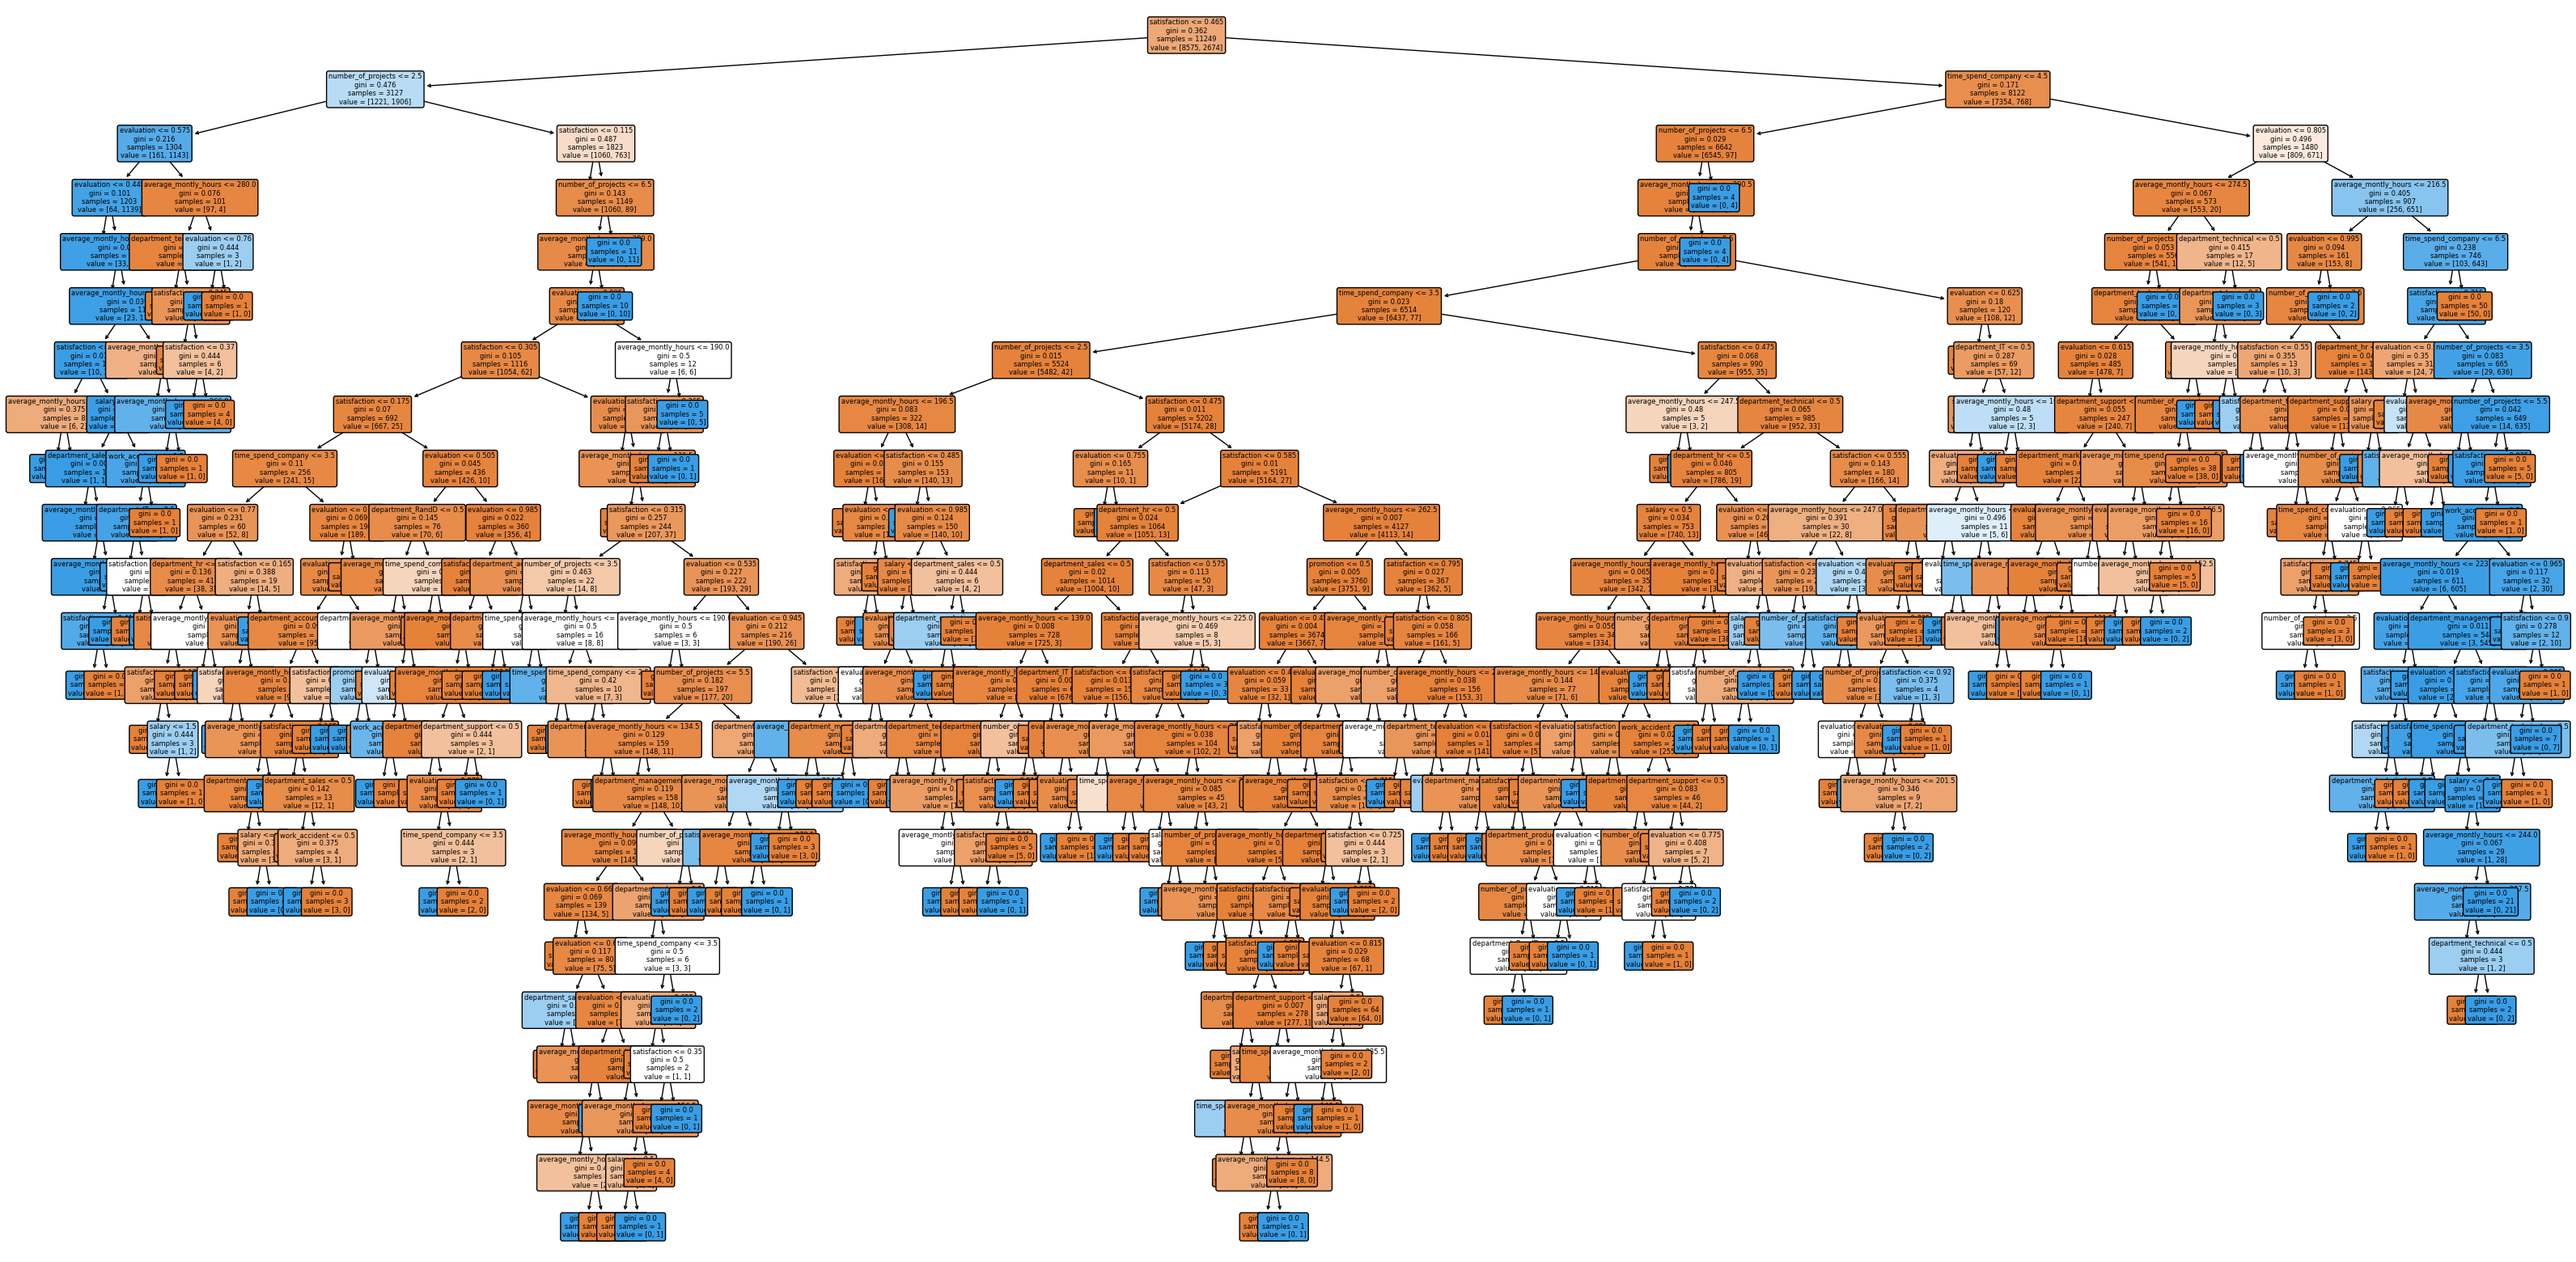

In [55]:
from sklearn import tree
plt.figure(figsize=(40,20))  
_ = tree.plot_tree(model, feature_names = Xtrain.columns, 
             filled=True, fontsize=6, rounded = True)
plt.show()

### since we see overfitting, we will tune some hyperparameters on our model.
Overfitting is a classic problem in analytics, especially for the decision tree algorithm. Once the tree is fully grown, it may provide highly accurate predictions for the training sample, yet fail to be that accurate on the test set. For that reason, the growth of the decision tree is usually controlled by these two methods:

1. “Pruning” the tree and setting a limit on the maximum depth it can have.
2. Limiting the minimum number of observations in one leaf of the tree.

I will go with pruning the tree and setting a limit on the maximum depth it can have. 

In [56]:
# Initialize the DecisionTreeClassifier while limiting the depth of the tree to 5
model_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model
model_depth_5.fit(Xtrain,ytrain)

# Print the accuracy of the prediction for the training set
print(model_depth_5.score(Xtrain,ytrain)*100)

# Print the accuracy of the prediction for the test set
print(model_depth_5.score(Xtest,ytest)*100)

97.71535247577563
97.06666666666666


In [57]:
# Initialize the DecisionTreeClassifier while limiting the sample size in leaves to 100
model_sample_100 = DecisionTreeClassifier(min_samples_leaf = 100, random_state=42)

# Fit the model
model_sample_100.fit(Xtrain,ytrain)

# Print the accuracy of the prediction (in percentage points) for the training set
print(model_sample_100.score(Xtrain,ytrain)*100)

# Print the accuracy of the prediction (in percentage points) for the test set
print(model_sample_100.score(Xtest,ytest)*100)

96.57747355320473
96.13333333333334


##Both the methods gave the reasonable model.
 only accuracy is not enough to claim that the model is a good one. we need to look at confusion matrix

If target is leavers, focus on FN<br />
recall score = TP/(TP+FN)<br />
Lower FN , higher recall score<br />
Recall score - % of correct prediction among 1's which is leavers in our case.<br /><br />

If target is stayers, focus on FP<br />
specificity = TN/(TN+FP)<br />
Lower FP, higher Specificity<br />
Specificity score - % of correct prediction among 0's which is stayers in our case.<br />

Even if  target is leavers, we may still focus on FP<br />
Precision = TP/(TP+FP)<br />
Lower FP, higher Precision<br />
Precision score - % of leavers in reality, among those predicted to leave.<br />

Notes: if one is interested in learning what is the percentage of people who truly left the company among those who were predicted to leave, then Precision score will be handy to use. The reason those scores are important is that general accuracy is not providing information about separate classes. For example, in our model around 76% are stayers. So if we just say "everybody is staying" we will have 76% accurate prediction. But in terms of recall, we will have very low value, as everybody who churned will be wrongly classified.

The Precision score is an important metric used to measure the accuracy of a classification algorithm. It is calculated as the fraction of True Positives over the sum of True Positives and False Positives, or
 =TP/(TP+FP)

we define True Positives as the number of employees who actually left, and were classified correctly as leaving
we define False Positives as the number of employees who actually stayed, but were wrongly classified as leaving
If there are no False Positives, the precision score is equal to 1. If there are no True Positives, the precision score is equal to 0.

In [58]:
# Import the function to calculate precision score
from sklearn.metrics import precision_score

# Predict whether employees will churn using the test set
prediction = model.predict(Xtest)

# Calculate precision score by comparing target_test with the prediction
precision_score(ytest, prediction)

0.9231590181430096

Calculating accuracy metrics: recall
The Recall score is another important metric used to measure the accuracy of a classification algorithm. It is calculated as the** fraction of True Positives over the sum of True Positives and False Negatives**, or =TP/(TP+FN)
 

If there are no False Negatives, the recall score is equal to 1. If there are no True Positives, the recall score is equal to 0.

In this exercise, you will calculate the recall score (using the sklearn function recall_score) for your initial classification model.

The variables features_test and target_test are available in your workspace.

In [59]:
# Import the function to calculate precision score
from sklearn.metrics import recall_score

# Predict whether employees will churn using the test set
prediction = model.predict(Xtest)

# Calculate precision score by comparing target_test with the prediction
recall_score(ytest, prediction)

0.9643255295429208

In [60]:
#Just Recall or specificity will not help us to predict the churn correctly. Let us tkae AUC-ROC score

In [61]:
# Import the function to calculate ROC/AUC score
from sklearn.metrics import roc_auc_score

# Use initial model to predict churn (based on features_test)
prediction = model.predict(Xtest)

# Calculate ROC/AUC score by comparing target_test with the prediction
roc_auc_score(ytest, prediction)

0.969544468241492

### CLASS IMBALANCE

In [62]:
# we are getting good accuracy score.However we have a imbalance in the classes of stayers verus leavers. 0s = 76% and 1s = 24%.
#Obviously the model peredicts more 0s.

In [63]:
# Initialize the DecisionTreeClassifier 
model_depth_5_b = DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=42)

# Fit the model
model_depth_5_b.fit(Xtrain,ytrain)

# Print the accuracy of the prediction (in percentage points) for the test set
print(model_depth_5_b.score(Xtest,ytest)*100)

93.70666666666668


In [64]:
# Initialize the model
model_depth_7_b = DecisionTreeClassifier(max_depth=7,class_weight="balanced",random_state=42)
# Fit it to the training component
model_depth_7_b.fit(Xtrain,ytrain)
# Make prediction using test component
prediction_b = model_depth_7_b.predict(Xtest)
# Print the recall score for the balanced model
print(recall_score(ytest, prediction_b))
# Print the ROC/AUC score for the balanced model
print(roc_auc_score(ytest, prediction_b))



0.9319955406911928
0.9593381138436686


Maximum depth, minimum sample size and similar other parameters that need to be tuned to find the best value are known as hyperparameters. To find the optimal values for those hyperparameters, one needs to create a grid, a list of applicable values that he or she wants to test and then search among those values the one that achieves highest accuracy

## Cross-validation

In [65]:
# Import the function for implementing cross validation
from sklearn.model_selection import cross_val_score

# Use that function to print the cross validation score for 10 folds
print(cross_val_score(model,features,target,cv=10))

[0.984      0.98933333 0.97066667 0.96866667 0.96266667 0.97866667
 0.99133333 0.994      1.         1.        ]


In [66]:
# Generate values for maximum depth
depth = [i for i in range(5,21,1)]

# Generate values for minimum sample size
samples = [i for i in range(50,500,50)]

# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, min_samples_leaf=samples)

In [67]:
# import the GridSearchCV function
from sklearn.model_selection import GridSearchCV

# set up parameters: done
parameters = dict(max_depth=depth, min_samples_leaf=samples)

# initialize the param_search function using the GridSearchCV function, initial model and parameters above
param_search = GridSearchCV(model, parameters, cv=3)

# fit the param_search to the training dataset
param_search.fit(Xtrain, ytrain)

# print the best parameters found
print(param_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 50}


### Important features for predicting attrition

In [68]:
# Calculate feature importances
feature_importances = model_depth_5_b.feature_importances_

# Create a list of features: done
feature_list = list(features)

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False)

,importance
satisfaction,0.450485
time_spend_company,0.391953
evaluation,0.104542
average_montly_hours,0.038023
number_of_projects,0.009378
salary,0.002285
department_technical,0.002206
department_sales,0.001128
promotion,0.000000
department_IT,0.000000


### It seems that satisfaction is by far the most impactful feature on the decision to leave the company or not.

In [69]:
# select only features with relative importance higher than 1%
selected_features = relative_importances[relative_importances.importance>0.01]

# create a list from those features: done
selected_list = selected_features.index

# transform both features_train and features_test components to include only selected features
Xtrain_selected = Xtrain[selected_list]
Xtest_selected = Xtest[selected_list]

In [70]:
Xtrain_selected

,satisfaction,evaluation,average_montly_hours,time_spend_company
14480,0.38,0.86,139,6
1934,0.78,0.93,225,5
7900,0.56,0.71,243,3
2952,0.96,0.62,217,2
4367,0.83,0.53,211,4
...,...,...,...,...
5191,0.52,0.96,246,3
13418,0.49,0.65,233,7
5390,0.66,0.73,249,2
860,0.79,1.00,218,5


In [71]:
Xtest_selected

,satisfaction,evaluation,average_montly_hours,time_spend_company
6723,0.65,0.96,226,2
6473,0.88,0.80,166,2
4679,0.69,0.98,214,2
862,0.41,0.47,154,3
7286,0.87,0.76,254,2
...,...,...,...,...
10371,0.99,0.37,219,6
12541,0.81,0.87,254,5
2656,0.67,0.59,177,3
6759,0.22,0.57,174,6


In [72]:
# Initialize the best model using parameters provided in description
model_best = DecisionTreeClassifier(max_depth =5, min_samples_leaf =50, class_weight="balanced", random_state=42)



In [73]:
# Fit the model using only selected features from training set: done
model_best.fit(Xtrain_selected, ytrain)

# Make prediction based on selected list of features from test set
prediction_best = model_best.predict(Xtest_selected)



In [74]:
# Print the general accuracy of the model_best
print(model_best.score(Xtest_selected, ytest) * 100)

# Print the recall score of the model predictions
print(recall_score(ytest, prediction_best) * 100)

# Print the ROC/AUC score of the model predictions
print(roc_auc_score(ytest, prediction_best) * 100)

93.46666666666667
91.9732441471572
92.95472582401672
